In [2]:



from pysonnet.outputs import SYZParameter
import numpy as np
import os
import base64
import matplotlib.pyplot as plt


In [4]:
def image_to_base64(image_path):
    """
    Converts an image file to a Base64-encoded string.
    Parameters:
        image_path (str): The path to the image file.
    Returns:
        str: The Base64-encoded string representation of the image.
    """
    try:
        with open(image_path, "rb") as image_file:
            base64_string = base64.b64encode(image_file.read()).decode('utf-8')
        return base64_string
    except FileNotFoundError:
        return f"Error: File not found at {image_path}"
    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
def get_file_path():
    """
    Returns the file path of a specific .s2p file.
    This function provides the absolute path to the 'cpw.s2p' file
    located in the 'fitting' directory of the project.
    Returns:
        str: The absolute file path to 'cpw.s2p'.
    """

    file_path = '/Users/eesh/Documents/mcp_hackathon_2025/cqed-design-ai/fitting/cpw.s2p'
    return file_path

def get_plot_folder():
    """
    Returns the file path to the folder where plots are stored.
    This function provides the absolute path to the directory
    designated for storing plot files generated by the application.
    Returns:
        str: The absolute path to the plots folder.
    """

    plot_folder = '/Users/eesh/Documents/mcp_hackathon_2025/cqed-design-ai/fitting/fitting_server/plots'
    return plot_folder

def plot_s21(file_path, plot_folder_path=None):
    """
    Plots the S21 parameter (magnitude in dB) from a Touchstone file and optionally saves the plot.
    Parameters:
        file_path (str): Path to the Touchstone file containing the S-parameter data.
        plot_folder_path (str, optional): Directory where the plot will be saved. If None, the plot is not saved.
    Returns:
        numpy.ndarray: The S21 parameter (S[:, 0, 1]) extracted from the S-matrix.
    Notes:
        - The function reads the Touchstone file using the `SYZParameter.from_touchstone` method.
        - Frequencies are assumed to be in GHz.
        - The plot shows the magnitude of S21 in dB (20 * log10(|S21|)) as a function of frequency.
        - If `plot_folder_path` is provided and does not exist, it will be created.
        - The saved plot is named "s21_plot.png" in the specified folder.
    Example:
        s12 = plot_s21("example.s2p", plot_folder_path="plots")
    """

    import matplotlib.pyplot as plt

    # Read in the Touchstone file
    sp = SYZParameter.from_touchstone(file_path)

    # Extract frequencies (GHz) and the S-matrix
    f = sp.f  # shape (N,) in GHz
    S = sp.value  # shape (N, 2, 2)

    # Pick out S12 = measurement at port 1 due to excitation at port 2
    s21 = S[:, 0, 1]

    # Plot magnitude in dB
    fig = plt.figure()
    plt.plot(f, 20 * np.log10(np.abs(s21)), marker='o')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('S$_{12}$ (dB)')
    plt.title('S$_{12}$ vs Frequency')
    plt.grid(True)
    plt.show()

    plot_path = None
    if plot_folder_path:
        if not os.path.exists(plot_folder_path):
            os.makedirs(plot_folder_path)
        plot_path = os.path.join(plot_folder_path, "s21_plot.png")
        fig.savefig(plot_path)
        print(f"Plot saved to {plot_path}")
    base64_img = image_to_base64(plot_path) if plot_path else None
    return base64_img
    # return ImageContent( data=base64_img, mime_type='image/png', description='S21 Plot')

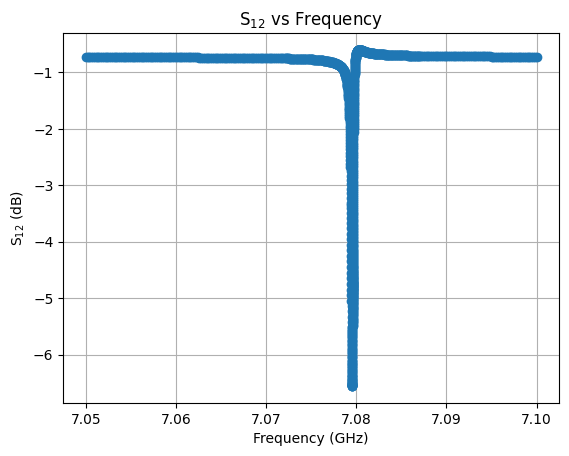

Plot saved to /Users/eesh/Documents/mcp_hackathon_2025/cqed-design-ai/fitting/fitting_server/plots/s21_plot.png


In [6]:
file_path = get_file_path()
plot_folder_path = get_plot_folder()
s21_base64 = plot_s21(file_path, plot_folder_path)

In [7]:
s21_base64 

'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy80BEi2AAAACXBIWXMAAA9hAAAPYQGoP6dpAABKO0lEQVR4nO3deXxU1f3/8fdkMpnsgZCEpYQAYVMUWQTUioCySlWwKC0qIClKtda9Yr/9FbBaRdAuWnGpAq0brnRxAxUBFQVFVBbZRNnCGkgCCZNJcn5/UEbHJJOZZNbc1/PxyEPmzrl3PnMyDm/OvedcmzHGCAAAAJYRF+kCAAAAEF4EQAAAAIshAAIAAFgMARAAAMBiCIAAAAAWQwAEAACwGAIgAACAxRAAAQAALIYACAAAYDEEQAAAAIshAAIAAFgMARAAAMBiCIAAAAAWQwAEAACwGAIgAACAxRAAAQAALIYACAAAYDEEQAAAAIshAAIAAFgMARAAAMBiCIAAAAAWQwAEAACwGAIgAACAxRAAAQAALIYACAAAYDEEQAAAAIshAAIAAFgMARAAAMBiCIAAAAAWQwAEAACwGAIgAACAxRAAAQAALIYACAAAYDEEQAAAAIshAAIAAFgMARCAJOnLL7/U2LFjlZeXp8TERP3oRz/S0KFD9dBDD0W6tEaZP3++bDZbrT/Tpk2LdHkAEBHxkS4AQOR9+OGHGjx4sNq1a6cpU6aoVatW2rlzpz766CP95S9/0Q033BDpEhvtrrvuUocOHby2nXbaaRGqBgAiiwAIQPfcc48yMjK0evVqNWvWzOu5/fv3R6aoIBs5cqTOPPNMv9sfO3ZMKSkpIawIACKHU8AAtG3bNnXv3r1G+JOknJyckL3uSy+9JJvNpmXLltV47rHHHpPNZtO6deskSaWlpbrpppvUvn17OZ1O5eTkaOjQoVqzZk2j65gxY4ZsNps2bNig8ePHq3nz5jr33HM9z+/evVuTJ09Wy5Y

In [8]:
sp = SYZParameter.from_touchstone(file_path)

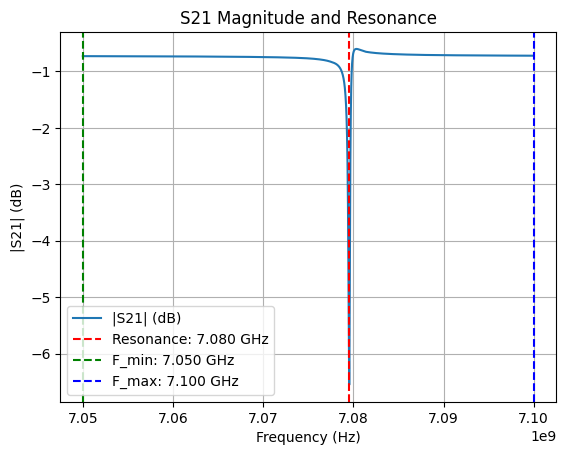

Total Quality Factor (Q): 141.59074031076045


In [9]:
f = sp.f  # shape (N,) in GHz
S = sp.value  # shape (N, 2, 2)
s21 = S[:, 0, 1]

def extract_total_quality_factor(freq, s21):
    """
    Extracts the total quality factor (Q) from the given frequency and S21 data.
    Parameters:
        freq (numpy.ndarray): Array of frequency values (in GHz).
        s21 (numpy.ndarray): Array of S21 parameter values (complex).
    Returns:
        float: The total quality factor (Q).
    """
    # Convert frequency to Hz for fitting
    freq_hz = freq * 1e9

    # Find the resonance frequency (frequency at minimum |S21|)
    resonance_index = np.argmin(np.abs(s21))
    f_res = freq_hz[resonance_index]

    # Calculate the bandwidth (FWHM) around the resonance frequency
    magnitude = 20 * np.log10(np.abs(s21))
    half_max = np.max(magnitude) - 3  # 3 dB below the max
    indices = np.where(magnitude >= half_max)[0]
    f_min = freq_hz[indices[0]]
    f_max = freq_hz[indices[-1]]
    bandwidth = f_max - f_min

    # Calculate the total quality factor
    Q = f_res / bandwidth

    # Plot the S21 magnitude and mark the resonance frequency
    plt.figure()
    plt.plot(freq_hz, magnitude, label='|S21| (dB)')
    plt.axvline(f_res, color='r', linestyle='--', label=f'Resonance: {f_res/1e9:.3f} GHz')
    plt.axvline(f_min, color='g', linestyle='--', label=f'F_min: {f_min/1e9:.3f} GHz')
    plt.axvline(f_max, color='b', linestyle='--', label=f'F_max: {f_max/1e9:.3f} GHz')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|S21| (dB)')
    plt.title('S21 Magnitude and Resonance')
    plt.legend()
    plt.grid(True)
    plt.show()

    return Q

# Example usage
Q_total = extract_total_quality_factor(f, s21)
print(f"Total Quality Factor (Q): {Q_total}")